# Membuat Classifier nya

In [1]:
# necessary imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# loading data

fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
# shape of data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [4]:
# data type of dataset
X_train.dtype, X_test.dtype, y_train.dtype, y_test.dtype

(dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'))

In [5]:
# creating validation data snd scaling data to range (0-1)

X_valid, X_train = X_train[:4000], X_train[4000:] / 255
y_valid, y_train = y_train[:4000], y_train[4000:]
X_test = X_test / 255

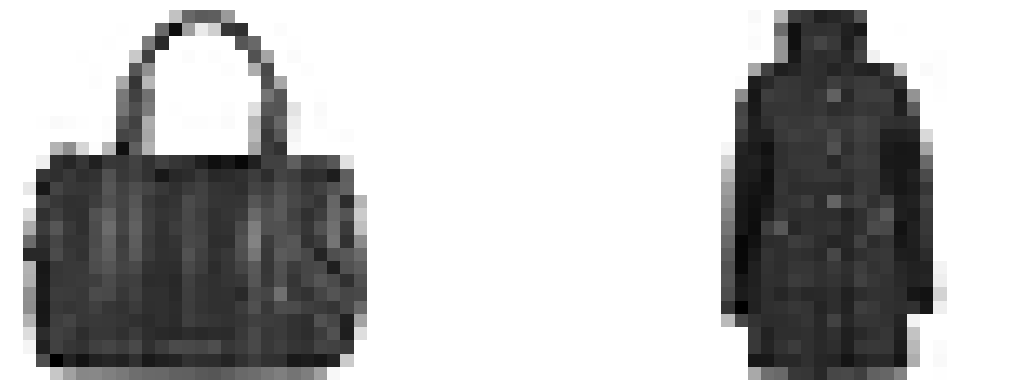

In [6]:

plt.figure(figsize = (15, 4))
plotnumber = 1

for i in range(2):
    if plotnumber <= 2:
        ax = plt.subplot(1, 2, plotnumber)
        plt.imshow(X_train[i], cmap = 'binary')
        plt.axis('off')
        
    plotnumber += 1
  
plt.tight_layout()
plt.show()

In [101]:
IMG_SIZE = (100, 100)
BATCH_SIZE = 16
INPUT_SHAPE = IMG_SIZE + (3,)
NUM_CLASSES = 3  # Ganti dengan jumlah kelas yang sesuai

## Defiine params and lib

In [102]:
# !git clone https://github.com/rivaelsagala/project-PM-kel-05.git

In [103]:
# from google.colab import drive
# drive.mount('/content/drive')

## Membuat dataset generatornya dan mendefenisikan data Generatornya

### Augmentasi Data

In [104]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation and Generators
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=30,  # Meningkatkan variasi data
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    brightness_range=[0.6, 1.4]
)


validation_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

## Mendefinisikan asal folder sumber file berasal

In [105]:
# Directories (Adjust paths as needed)
train_dir = 'dataset/train/'
val_dir = 'dataset/valid/'
test_dir = 'dataset/test/'

# Load Data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Update NUM_CLASSES based on data
NUM_CLASSES = train_generator.num_classes
labels = train_generator.class_indices.keys()


Found 3570 images belonging to 3 classes.
Found 339 images belonging to 3 classes.
Found 173 images belonging to 3 classes.


In [106]:
labels

dict_keys(['mujahir', 'red_devil', 'sepat'])

# Mengubah generator data Python Menjadi dataset TensorFlow

agar dapat digunakan dalam pipeline pelatihan, validasi, atau pengujian model secara efisien. Dengan ini, data dapat diproses dalam batch kecil langsung dari generator, mendukung augmentasi, dan tetap hemat memori.

In [107]:
# Define TF Data Generator
def tf_data_generator(generator, input_shape):
    num_class = generator.num_classes
    tf_generator = tf.data.Dataset.from_generator(
        lambda: generator,
        output_types=(tf.float32, tf.float32),
        output_shapes=([None, input_shape[0], input_shape[1], input_shape[2]], [None, num_class])
    )
    return tf_generator

train_data = tf_data_generator(train_generator, INPUT_SHAPE)
val_data = tf_data_generator(validation_generator, INPUT_SHAPE)
test_data = tf_data_generator(test_generator, INPUT_SHAPE)


In [ ]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(100, 150, 3)),

#     tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),

#     tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),

#     tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(64, activation='relu'),

#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(3, activation='softmax'),
# ])


# # Kompilasi model
# print('Compiling Model.......')
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])


# ANN

In [109]:
# Model ANN (Artificial Neural Network)
model = Sequential([
    Input(shape=INPUT_SHAPE),  # Input layer sesuai ukuran gambar
    Flatten(),  # Mengubah input dari 3D (gambar) ke 1D
    
    Dense(1024, activation='relu'),  # Fully connected layer dengan 1024 unit
    BatchNormalization(),  # Normalisasi untuk stabilisasi pelatihan
    Dropout(0.2),  # Mengurangi overfitting
    
    Dense(512, activation='relu'), 
    BatchNormalization(),
    Dropout(0.1),
    
    Dense(256, activation='relu'),
    BatchNormalization(),




    
    Dense(NUM_CLASSES, activation='softmax')  # Output layer sesuai jumlah kelas
])


# Summary Model
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 30000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1024)           │    30,721,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,385,091 (119.72 MB)

 Trainable params: 31,381,507 (119.71 MB)

 Non-trainable params: 3,584 (14.00 KB)

# Prebuild model

### Build Base Model

In [110]:
# from tensorflow.keras.applications import MobileNetV2

# # get base models
# base_model = MobileNetV2(
#     input_shape=input_shape,
#     include_top=False,
#     weights='imagenet',
#     classes=num_class,
# )

# add to top layer

In [111]:
# from tensorflow.keras import layers,Sequential
# from tensorflow.keras.models import Model

# #Adding custom layers
# x = base_model.output
# x = layers.GlobalAveragePooling2D()(x)
# x = layers.Dropout(0.2)(x)
# x = layers.Dense(1024, activation="relu")(x)

# predictions = layers.Dense(num_class, activation="softmax")(x)
# model = Model(inputs=base_model.input, outputs=predictions)

# model.summary()

# # Compile the model
# print('Compiling Model.......')
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

### Build Base model

In [112]:
# from efficientnet.tfkeras import EfficientNetB1

# # get base models
# base_model = EfficientNetB1(
#     input_shape=input_shape,
#     include_top=False,
#     weights='noisy-student',
#     classes=num_class,
# )

### Add top network layer to models

In [113]:
# from tensorflow.keras import layers,Sequential
# from tensorflow.keras.models import Model

# #Adding custom layers
# x = base_model.output
# x = layers.GlobalAveragePooling2D()(x)
# x = layers.Dropout(0.5)(x)
# x = layers.Dense(1024, activation="relu")(x)

# predictions = layers.Dense(num_class, activation="softmax")(x)
# model = Model(inputs=base_model.input, outputs=predictions)

# model.summary()

# # Compile the model
# print('Compiling Model.......')
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

In [114]:
from keras.callbacks import ReduceLROnPlateau
# Callbacks
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_accuracy',
    patience=4,
    verbose=1,
    factor=0.7,
    min_lr=0.00001
)

In [115]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [116]:
# Kompilasi Model
model.compile(
    optimizer=tf.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [117]:
# Summary Model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 30000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1024)           │    30,721,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,385,091 (119.72 MB)

 Trainable params: 31,381,507 (119.71 MB)

 Non-trainable params: 3,584 (14.00 KB)

In [118]:
# Train model

# Pelatihan Model
# Pelatihan Model
# history = model.fit(
#     train_generator,
#     validation_data=validation_generator,
#     epochs=2,  # Ganti sesuai kebutuhan, lebih banyak epoch
#     steps_per_epoch=len(train_generator),
#     validation_steps=len(validation_generator),
#     callbacks=[learning_rate_reduction, early_stopping]
# )

history = model.fit(
    train_generator,
    epochs=3,
    validation_data=validation_generator,
    callbacks=[learning_rate_reduction, early_stopping]
)

Epoch 1/3


c:\Users\M S I\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


224/224 ━━━━━━━━━━━━━━━━━━━━ 89s 384ms/step - accuracy: 0.4308 - loss: 1.3225 - val_accuracy: 0.5044 - val_loss: 1.1336 - learning_rate: 0.0010
Epoch 2/3
224/224 ━━━━━━━━━━━━━━━━━━━━ 85s 376ms/step - accuracy: 0.5693 - loss: 0.9539 - val_accuracy: 0.8348 - val_loss: 0.5570 - learning_rate: 0.0010
Epoch 3/3
224/224 ━━━━━━━━━━━━━━━━━━━━ 86s 383ms/step - accuracy: 0.5915 - loss: 0.8948 - val_accuracy: 0.6342 - val_loss: 0.8018 - learning_rate: 0.0010


In [119]:
# Evaluasi Model
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f"Test Accuracy: {test_accuracy:.2f}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.7744 - loss: 0.6607
Test Accuracy: 0.82


In [120]:
history.history['loss']

[1.1434686183929443, 0.9182990789413452, 0.8786771297454834]

In [121]:
history.history['accuracy']

[0.4663865566253662, 0.5924369692802429, 0.608123242855072]

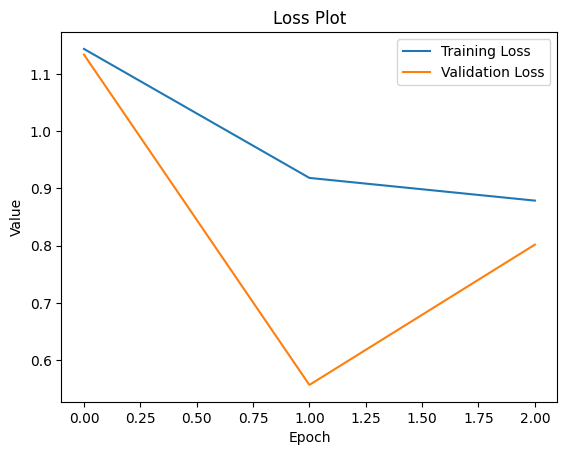

In [122]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from sklearn.metrics import classification_report, confusion_matrix
from keras.preprocessing import image
from keras.callbacks import ReduceLROnPlateau
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

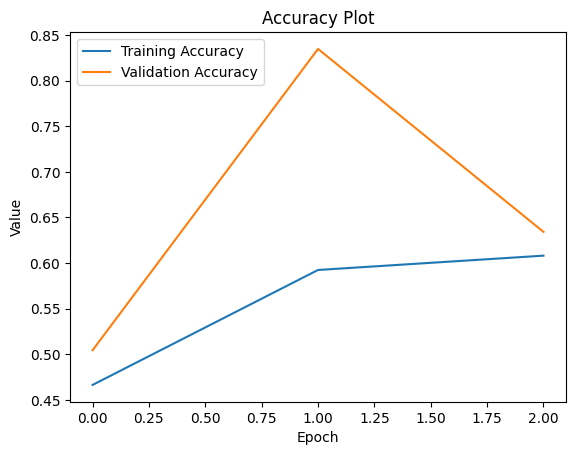

In [123]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

In [124]:
model.save('model/my_model.keras')  # Menyimpan dalam format HDF5


# MODEL_BASE_PATH = "model"
# PROJECT_NAME = "medium_project"
# SAVE_MODEL_NAME = "model.h5"
# save_model_path = os.path.join(MODEL_BASE_PATH, PROJECT_NAME, SAVE_MODEL_NAME)

# if os.path.exists(os.path.join(MODEL_BASE_PATH, PROJECT_NAME)) == False:
#     os.makedirs(os.path.join(MODEL_BASE_PATH, PROJECT_NAME))
    
# print('Saving Model At {}...'.format(save_model_path))
# model.save(save_model_path,include_optimizer=False) 


# Evaluate Models

In [125]:
loss, acc = model.evaluate(test_data,steps=len(test_generator),verbose=0)
print('Accuracy on training data: {:.4f} \nLoss on training data: {:.4f}'.format(acc,loss),'\n')
 
loss, acc = model.evaluate(test_data,steps=len(test_generator),verbose=0)
print('Accuracy on test data: {:.4f} \nLoss on test data: {:.4f}'.format(acc,loss),'\n')   

Accuracy on training data: 0.8150 
Loss on training data: 0.5834 

Accuracy on test data: 0.8150 
Loss on test data: 0.5834 



## Pengujian Prediksi dengan Model Checkpoint


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step


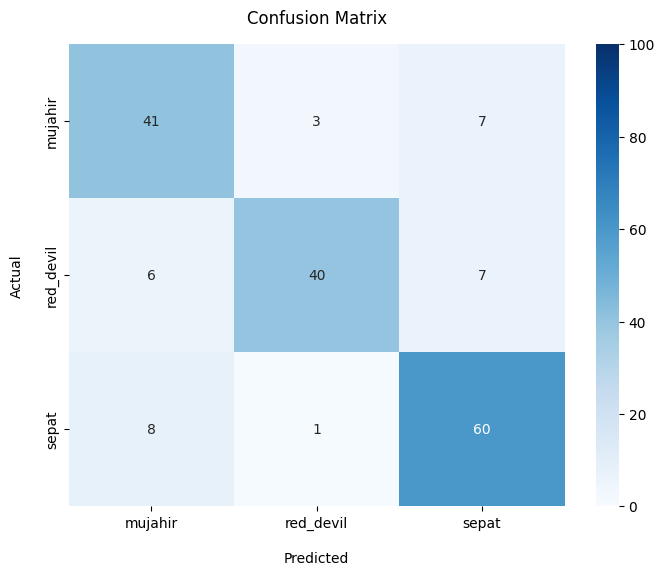

              precision    recall  f1-score   support

     mujahir       0.75      0.80      0.77        51
   red_devil       0.91      0.75      0.82        53
       sepat       0.81      0.87      0.84        69

    accuracy                           0.82       173
   macro avg       0.82      0.81      0.81       173
weighted avg       0.82      0.82      0.82       173



In [126]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model

# Muat model checkpoint
checkpoint = load_model('model/my_model.keras')

# Evaluasi model terbaik pada data uji
predictions = checkpoint.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Label sebenarnya dari dataset uji
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Hitung confusion matrix
confusion_mtx = confusion_matrix(true_classes, predicted_classes)

# Tampilkan confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues', vmin=0, vmax=100)
plt.xlabel('Predicted', labelpad=15)
plt.ylabel('Actual', labelpad=15)
plt.title('Confusion Matrix', pad=15)
plt.show()

# Mendapatkan metrik evaluasi
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

## Pengujian Prediksi dengan Model Pelatihan Keseluruhan (200 Epoch)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step


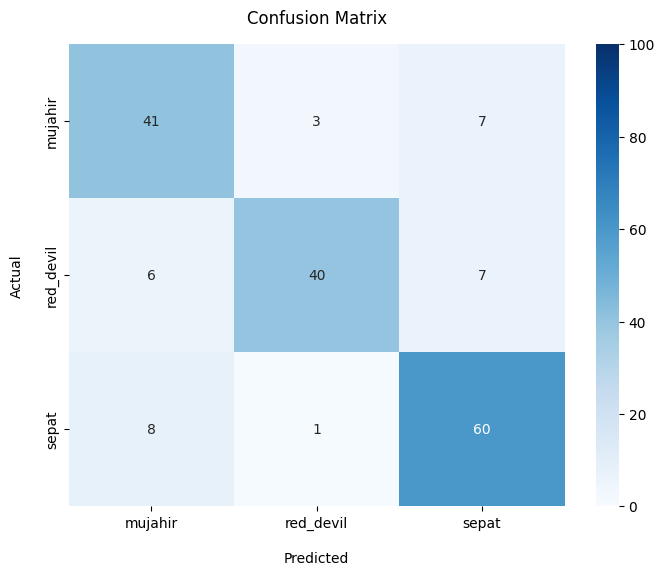

              precision    recall  f1-score   support

     mujahir       0.75      0.80      0.77        51
   red_devil       0.91      0.75      0.82        53
       sepat       0.81      0.87      0.84        69

    accuracy                           0.82       173
   macro avg       0.82      0.81      0.81       173
weighted avg       0.82      0.82      0.82       173



In [127]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluasi model pada data uji
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Label sebenarnya dari dataset uji
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Hitung confusion matrix
confusion_mtx = confusion_matrix(true_classes, predicted_classes)

# Tampilkan confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues', vmin=0, vmax=100)
plt.xlabel('Predicted', labelpad=15)
plt.ylabel('Actual', labelpad=15)
plt.title('Confusion Matrix', pad=15)
plt.show()

# Mendapatkan metrik evaluasi
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

In [128]:
from tensorflow.keras.models import load_model

# Memuat model SavedModel
loaded_model = load_model('model/my_model.keras')

# Menampilkan ringkasan model untuk memastikan berhasil dimuat
# print(loaded_model.summary())


In [129]:
def predict_image(img_upload, model = model):
  img = img_upload
  img_array = np.asarray(img)
  img_array = img_array*(1/225)
  img_input = tf.reshape(img_array, shape = [1, 100, 150, 3])
  Probability = sorted(model.predict(img_input)[0])[2]
  predict_class = np.argmax(model.predict(img_input))

  if predict_class == 0:
            label = 'mujahir'
  elif predict_class == 1:
            label = 'red_devil'
  else:
            label = 'sepat'

  plt.show()
  print(label)
  print("Probability: ", round(Probability*100,2), "%")
  print('\n')

In [130]:
# !pip install tf-explain



In [131]:
# import numpy as np
# import matplotlib.pyplot as plt
# from tf_explain.core.grad_cam import GradCAM

# # Ambil batch data uji
# x_test, y_test = next(validation_generator)  # Ambil satu batch dari generator validasi

# # Pilih satu sampel untuk dijelaskan
# image = x_test[0:1]  # Gambar pertama
# label = y_test[0:1]  # Label pertama (one-hot encoded)

# # Prediksi model untuk memastikan model telah dipanggil
# predictions = model.predict(image)

# # Dapatkan class_index dari prediksi model
# class_index = np.argmax(predictions[0])  # Indeks kelas yang diprediksi

# # Inisialisasi Grad-CAM
# explainer = GradCAM()

# # Jalankan Grad-CAM
# grid = explainer.explain(
#     validation_data=(image, label),
#     model=model,
#     layer_name='conv2d_3',  # Ganti dengan nama lapisan terakhir konvolusi Anda
#     class_index=class_index
# )

# # Tampilkan hasil
# plt.imshow(grid)
# plt.axis('off')
# plt.show()


In [132]:
# from tf_explain.core.grad_cam import GradCAM
# import matplotlib.pyplot as plt

# explainer = GradCAM()
# grid = explainer.explain(
#     validation_data=(x_test, y_test),  # Data validasi
#     model=model,
#     layer_name='conv2d_3'             # Nama layer terakhir konvolusi
# )

# plt.imshow(grid)
# plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


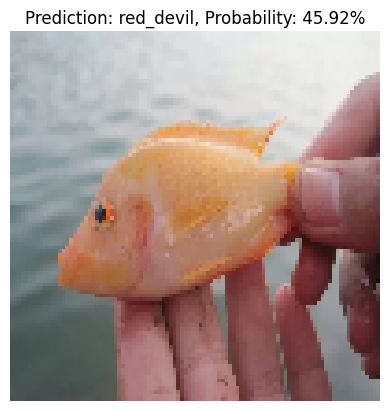

Label: red_devil
Probability: 45.92%


In [133]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Muat model yang telah dilatih
model_path = 'model/my_model.keras'  # Ganti dengan path model Anda
loaded_model = load_model(model_path)

def predict_image(img_path, model):
    """
    Memproses gambar dan memprediksi menggunakan model.
    Args:
        img_path (str): Path ke gambar yang akan diprediksi.
        model: Model deep learning yang telah dilatih.
    """
    # Load dan preprocess gambar
    img = image.load_img(img_path, target_size=(100, 100))  # Sesuaikan dengan ukuran input model Anda
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Tambahkan dimensi batch
    img_array /= 255.0  # Normalisasi gambar
    
    # Prediksi
    predictions = model.predict(img_array)
    predict_class = np.argmax(predictions[0])  # Ambil kelas dengan probabilitas tertinggi
    probability = np.max(predictions[0])  # Ambil probabilitas tertinggi

    # Map kelas ke label
    labels = ['mujahir', 'red_devil', 'sepat']  # Sesuaikan label dengan model Anda
    label = labels[predict_class]

    # Tampilkan hasil
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediction: {label}, Probability: {round(probability * 100, 2)}%")
    plt.show()

    print(f"Label: {label}")
    print(f"Probability: {round(probability * 100, 2)}%")

# Path ke gambar
# img_path = 'new_data/2297397025.webp'

img_path = 'new_data/ikan-red-devil-3137882226.webp'

# img_path = 'new_data/Ikan-Sepat.jpg'
# img_path = 'new_data/ikan-tilapia-03.jpeg'

# img_path = 'dataset/test/red_devil/Red-Devil-85_png_jpg.rf.50f8ddbc8fefae883d0bbc0e15a313c4.jpg'
# img_path = 'dataset/test/sepat/Sepat-82_png_jpg.rf.e732f4f00346193a2229b0dd0316526e.jpg'

# img_path = 'new_data/ikan-mujair1.jpg'


# img_path = 'new_data/devil.jpg'



# Prediksi gambar
predict_image(img_path, loaded_model)


In [134]:
# pip install streamlit tensorflow pillow


In [135]:
# pip install ipywidgets


In [136]:
# import numpy as np
# import matplotlib.pyplot as plt
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.models import load_model
# from ipywidgets import FileUpload
# from IPython.display import display  # Mengimpor display dari IPython

# # Muat model yang telah dilatih
# model_path = 'model/my_model.h5'  # Ganti dengan path model Anda
# loaded_model = load_model(model_path)

# def predict_image(img, model):
#     """
#     Memproses gambar dan memprediksi menggunakan model.
#     Args:
#         img: Gambar yang telah dimuat.
#         model: Model deep learning yang telah dilatih.
#     """
#     # Load dan preprocess gambar
#     img_array = image.img_to_array(img)
#     img_array = np.expand_dims(img_array, axis=0)  # Tambahkan dimensi batch
#     img_array /= 255.0  # Normalisasi gambar
    
#     # Prediksi
#     predictions = model.predict(img_array)
#     predict_class = np.argmax(predictions[0])  # Ambil kelas dengan probabilitas tertinggi
#     probability = np.max(predictions[0])  # Ambil probabilitas tertinggi

#     # Map kelas ke label
#     labels = ['mujahir', 'red_devil', 'sepat']  # Sesuaikan label dengan model Anda
#     label = labels[predict_class]

#     # Tampilkan hasil
#     plt.imshow(img)
#     plt.axis('off')
#     plt.title(f"Prediction: {label}, Probability: {round(probability * 100, 2)}%")
#     plt.show()

#     print(f"Label: {label}")
#     print(f"Probability: {round(probability * 100, 2)}%")

# # Upload file
# upload_widget = FileUpload(accept='image/*', multiple=False)
# display(upload_widget)  # Pastikan menggunakan display untuk menampilkan widget

# # Setelah mengupload, jalankan kode berikut
# def process_uploaded_file(change):
#     uploaded = upload_widget.value
#     for fn in uploaded:
#         # Mengambil konten gambar dari upload
#         img = image.load_img(uploaded[fn]['content'], target_size=(100, 150))
        
#         # Panggil fungsi prediksi
#         predict_image(img, loaded_model)

# # Panggil fungsi setelah upload selesai
# upload_widget.observe(process_uploaded_file, names='value')
